In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot  as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Real estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df=data.copy()
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


**DESCRIPTIVE ANALYSIS**

In [ ]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.shape

(414, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


##DATA CLEANSING AND TRANSFORMATION

In [ ]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
df=df.rename(columns={'X1 transaction date':'Transaction date','X2 house age':'House age',
                   'X3 distance to the nearest MRT station':'Distance to the nearest MRT station',
                   'X4 number of convenience stores':'No of convenience stores','X5 latitude':'Latitude','X6 longitude':'Longitude',
                   'Y house price of unit area':'Price'})

In [ ]:
df

,No,Transaction date,House age,Distance to the nearest MRT station,No of convenience stores,Latitude,Longitude,Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.drop(labels=['No'],axis=1,inplace=True)


In [ ]:
df

,Transaction date,House age,Distance to the nearest MRT station,No of convenience stores,Latitude,Longitude,Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


##EXPLORATORY DATA ANALYSIS

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 121.5 MB/s eta 0:00:00


In [ ]:
import sweetviz as  sv
report=sv.analyze(df)
report.show_html('./report.html')

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


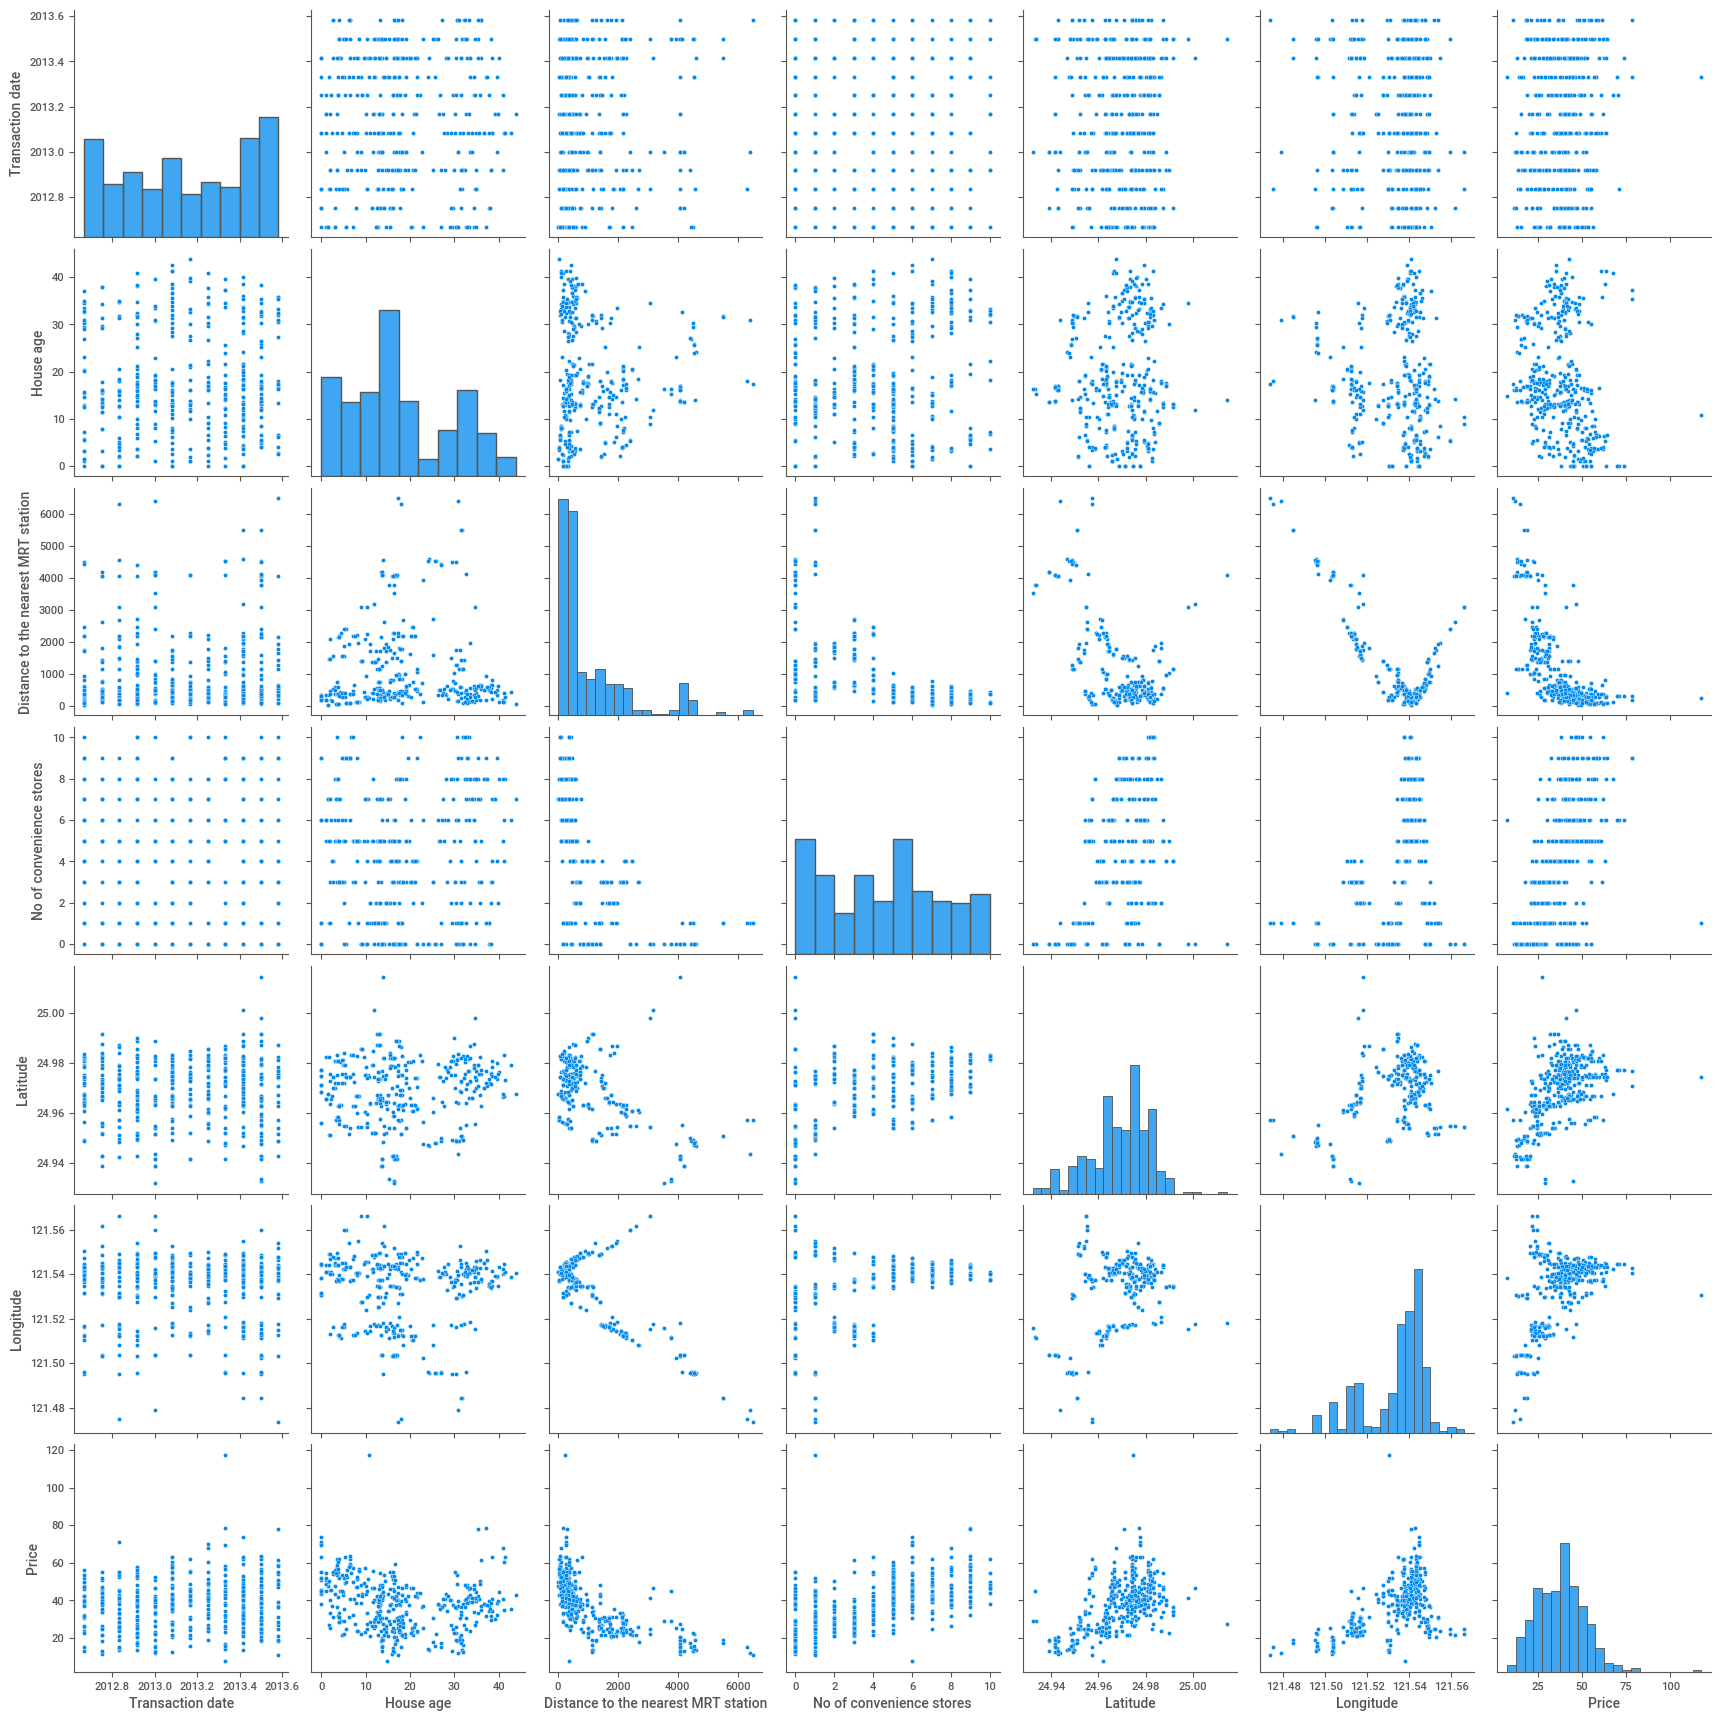

In [ ]:
sb.pairplot(df)
plt.show()

<Axes: >

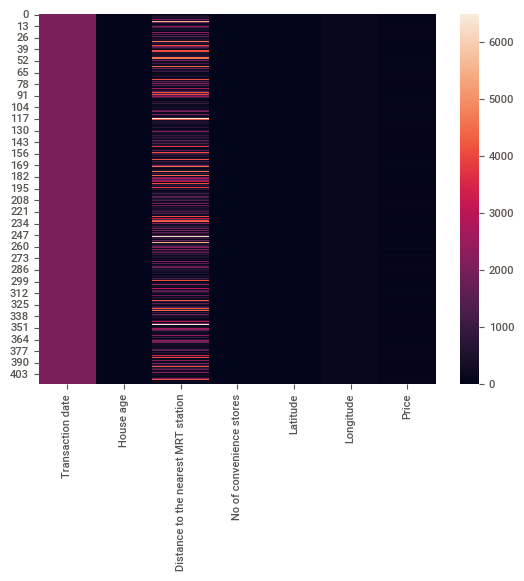

In [ ]:
sb.heatmap(df)

<Axes: >

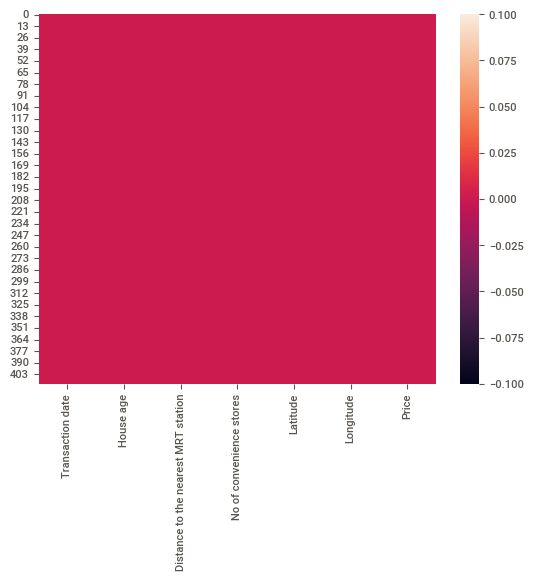

In [ ]:
sb.heatmap(df.isnull())

<Axes: >

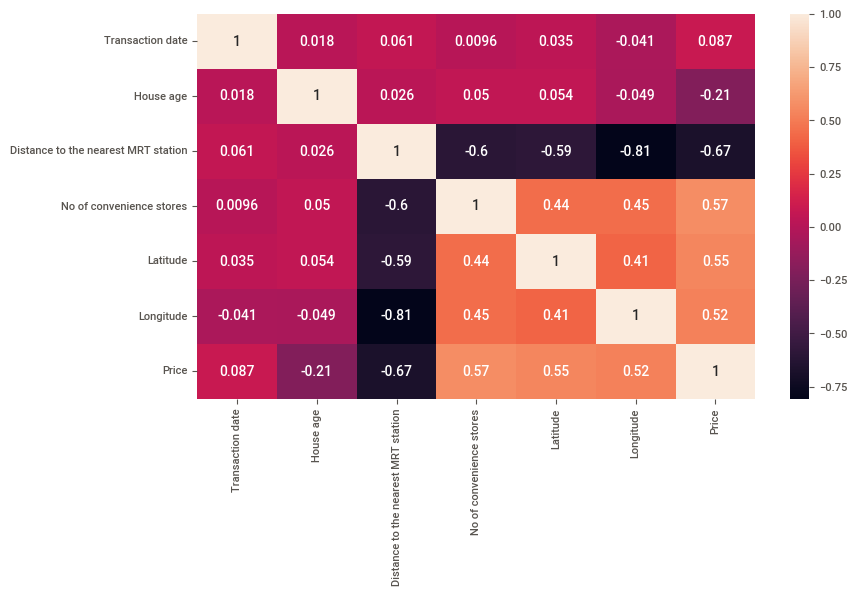

In [ ]:
plt.subplots(figsize=(9,5))
sb.heatmap(df.corr(),annot=True)

###SEPERATING THE INDEPENDENT AND DEPENDENT VARIABLES

In [ ]:
df

,Transaction date,House age,Distance to the nearest MRT station,No of convenience stores,Latitude,Longitude,Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
y = df.pop('Price')
x = df

In [ ]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Price, dtype: float64

In [ ]:
x.head()

,Transaction date,House age,Distance to the nearest MRT station,No of convenience stores,Latitude,Longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


###SPLITTING DATA INTO TRAINING AND TESTING DATASETS

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print('x_train shape:',x_train.shape,'\nx_test shape:',x_test.shape,
      '\ny_train shape:',y_train.shape,'\ny_test shape:',y_test.shape)

x_train shape: (331, 6) 
x_test shape: (83, 6) 
y_train shape: (331,) 
y_test shape: (83,)


###RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#model accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
print(r2_score(y_test,y_pred)*100)

80.72421812492388


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)


32.33700242790828
3.8916491967871494


Text(0, 0.5, 'y_pred')

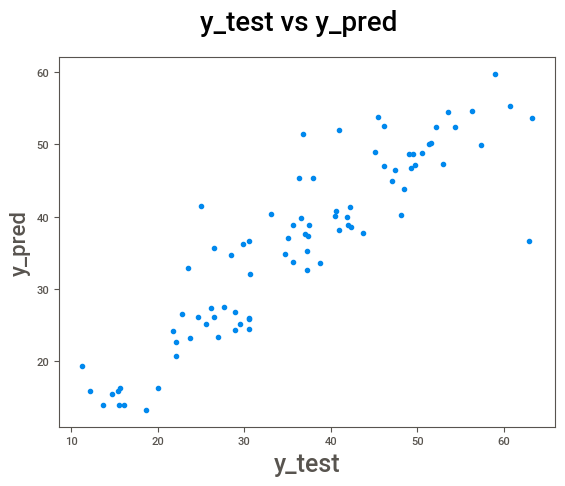

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##LINEAR REGRESSION

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1, random_state=101)

In [ ]:
print('X_train shape:',X_train.shape,'\nX_test shape:',X_test.shape,
      '\nY_train shape:',Y_train.shape,'\nY_test shape:',Y_test.shape)

X_train shape: (372, 6) 
X_test shape: (42, 6) 
Y_train shape: (372,) 
Y_test shape: (42,)


In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [ ]:
model1.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model1.predict(X_test)

In [ ]:
r2_score(Y_test,Y_pred)

0.6629900493381167

In [ ]:
MAE=mean_absolute_error(Y_test, Y_pred)
MSE=mean_squared_error(Y_test, Y_pred)
print('MAE: ',MAE,'\nMSE: ',MSE)

MAE:  5.1610220735074375 
MSE:  46.07781159640441


Text(0, 0.5, 'Y_pred')

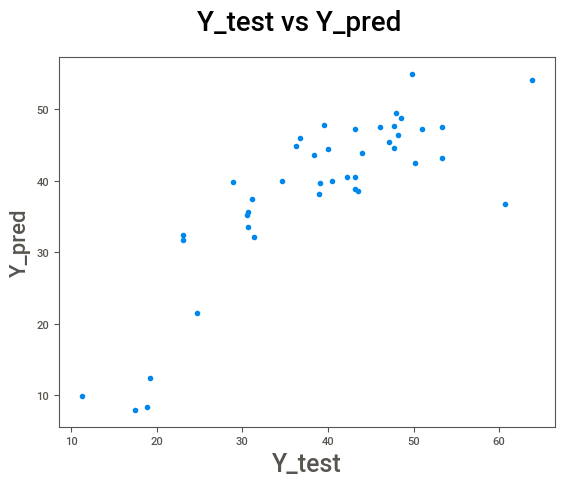

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize=20)              # Plot heading
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('Y_pred', fontsize=16)                          # Y-label

##DECISION TREE REGRESSION

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x,y, test_size=0.1, random_state=101)

In [ ]:
print('X1_train shape:',X1_train.shape,'\nX1_test shape:',X1_test.shape,
      '\nY1_train shape:',Y1_train.shape,'\nY1_test shape:',Y1_test.shape)

X1_train shape: (372, 6) 
X1_test shape: (42, 6) 
Y1_train shape: (372,) 
Y1_test shape: (42,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()

In [ ]:
model2.fit(X1_train,Y1_train)

DecisionTreeRegressor()

In [ ]:
Y1_pred=model2.predict(X1_test)

In [ ]:
r2_score(Y1_test,Y1_pred)

0.6340783550918645

In [ ]:
MAE=mean_absolute_error(Y_test, Y_pred)
MSE=mean_squared_error(Y_test, Y_pred)
RMSE= np.sqrt(MSE)
print('MAE: ',MAE,'\nMSE: ',MSE,'\nRMSE: ',RMSE)

MAE:  5.1610220735074375 
MSE:  46.07781159640441 
RMSE:  6.788063906328844
